In [1]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.colors as mcl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
import constants as cs

In [3]:
# Utility functions


#
# plot a time series data with monthly markers to determine seasonal trends
#
# Args:
#    dates  (type): timestamps of data collection
#    values (type): data values
#    xlabel (str) : plot x axis label
#    ylabel (str) : plot y axis label
#    title  (str) : plot title
#
# Returns:
#    None
#
def plot_monthly_markers(
    dates: pd.DataFrame, values: pd.DataFrame, xlabel: str, ylabel: str, title: str
) -> None:
    colormap = cm.get_cmap("hsv")
    norm = mcl.Normalize(vmin=1, vmax=12)
    colors = norm(dates.month)
    markers = [r"$\rm{" + d.strftime("%b") + "}$" for d in dates]

    plt.figure(figsize=(12, 4))
    # plot time series data
    plt.plot(
        dates,
        values,
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Plot each point individually to customize markers
    for d, v, c, m in zip(dates, values, colors, markers):
        plt.scatter(d, v, c=d.month, cmap=colormap, norm=norm, marker=m, s=150)
    plt.show()


#
# plot time series data
#
# Args:
#    dates  (type): timestamps of data collection
#    values (type): data values
#    xlabel (str) : plot x axis label
#    ylabel (str) : plot y axis label
#    title  (str) : plot title
#
# Returns:
#    None
#
def plot_ts(
    dates: pd.DataFrame, values: pd.DataFrame, xlabel: str, ylabel: str, title: str
) -> None:

    plt.figure(figsize=(12, 4))
    plt.plot(
        dates,
        values,
        marker="o",
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [4]:
# problem 3.4
# read the hours dataset into memory
hours = pd.read_csv(os.path.join(cs.DATASETS, "hours.dat"))
# create timestamps for the data
hours.set_index(pd.date_range("1982-07", periods=len(hours.index), freq="M"), inplace=True)

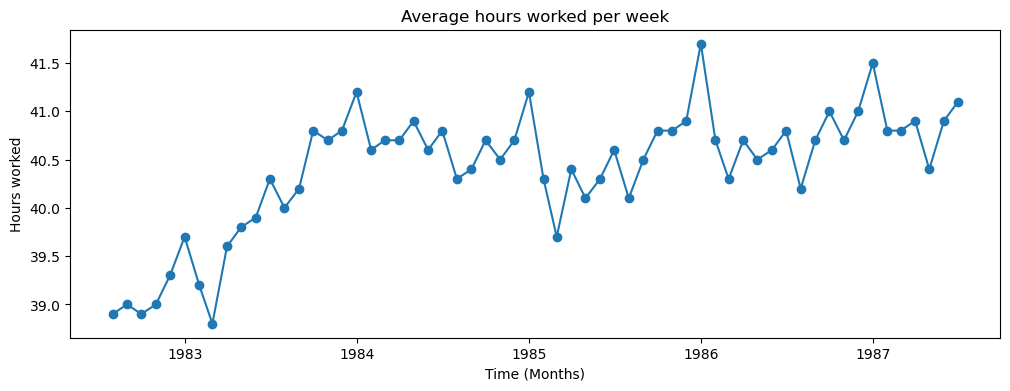

In [7]:
# 3.4 a
plot_ts(hours.index, hours["hours"], "Time (Months)", "Hours worked", "Average hours worked per week")

/tmp/ipykernel_106174/2184366160.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


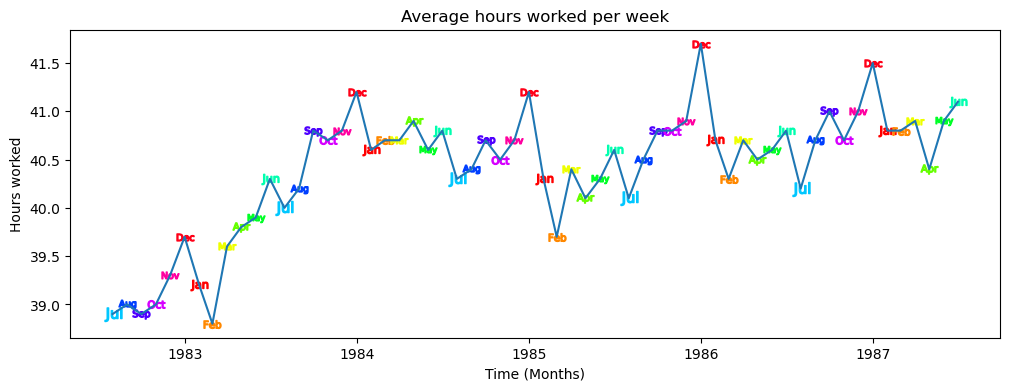

In [8]:
plot_monthly_markers(
    hours.index, hours["hours"], "Time (Months)", "Hours worked", "Average hours worked per week"
)

In [9]:
# problem 3.6
# read dataset and set timestamp
beersales = pd.read_csv(os.path.join(cs.DATASETS, "beersales.dat"))
beersales.set_index(
    pd.date_range("1975-01", periods=len(beersales.index), freq="M"), inplace=True
)
beersales["month"] = beersales.index.month
beersales["t"] = (beersales.index - beersales.index[0]).days

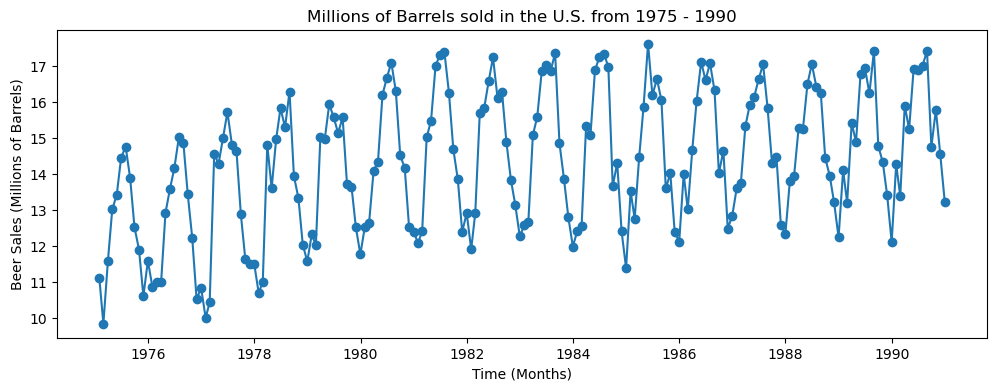

In [10]:
# 3.6 a
plot_ts(
    beersales.index,
    beersales["beersales"],
    "Time (Months)",
    "Beer Sales (Millions of Barrels)",
    "Millions of Barrels sold in the U.S. from 1975 - 1990",
)

/tmp/ipykernel_106174/2184366160.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


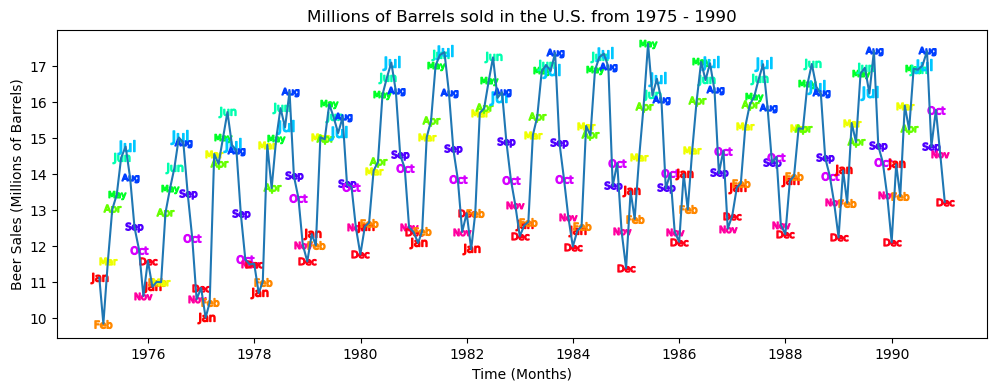

In [11]:
# 3.6 b
plot_monthly_markers(
    beersales.index,
    beersales["beersales"],
    "Time (Months)",
    "Beer Sales (Millions of Barrels)",
    "Millions of Barrels sold in the U.S. from 1975 - 1990",
)

In [12]:
# 3.6 c
model = smf.ols("beersales ~ C(month)", data=beersales).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              beersales   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     40.12
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.12e-42
Time:                        15:35:29   Log-Likelihood:                -276.64
No. Observations:                 192   AIC:                             577.3
Df Residuals:                     180   BIC:                             616.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.4857      0.264     47.309      0.000      11.965      13.006
C(month)[T.2]     -0.1426      0.373     -0.382      0.703      -0.879       0.594
C(month)[T.3]      2.0822      0.373      5.579      0.000       1.346       2.819
C(month)[T.4]      2.3976      0.373      6.424      0.000       1.661       3.134
C(month)[T.5]      3.5990      0.373      9.643      0.000       2.862       4.335
C(month)[T.6]      3.8498      0.373     10.314      0.000       3.113       4.586
C(month)[T.7]      3.7687      0.373     10.097      0.000       3.032       4.505
C(month)[T.8]      3.6088      0.373      9.669      0.000       2.872       4.345
C(month)[T.9]      1.5728      0.373      4.214      0.000       0.836       2.309
C(month)[T.10]     1.2544      0.373      3.361      0.001       0.518       1.991
C(month)[T.11]    -0.0480      0.373     -0.129      0.898      -0.784       0.689
C(month)[T.12]    -0.4231      0.373     -1.134      0.258      -1.160       0.313
==============================================================================
Omnibus:                       23.704   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.359
Skew:                          -0.890   Prob(JB):                     6.95e-07
Kurtosis:                       3.614   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_106174/2184366160.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


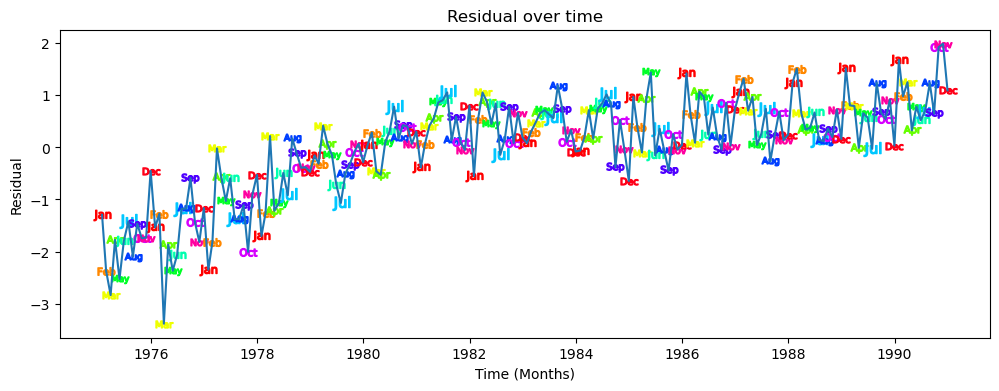

In [13]:
# 3.6 d
plot_monthly_markers(beersales.index, model.resid_pearson, "Time (Months)", "Residual", "Residual over time")

In [14]:
# 3.6 e
model = smf.ols("beersales ~ t + np.power(t, 2) + C(month)", data=beersales).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              beersales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           9.47e-86
Time:                        15:40:37   Log-Likelihood:                -164.23
No. Observations:                 192   AIC:                             356.5
Df Residuals:                     178   BIC:                             402.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4667      0.188     55.629      0.000      10.095      10.838
C(month)[T.2]     -0.1568      0.209     -0.750      0.454      -0.569       0.256
C(month)[T.3]      2.0527      0.209      9.822      0.000       1.640       2.465
C(month)[T.4]      2.3535      0.209     11.261      0.000       1.941       2.766
C(month)[T.5]      3.5401      0.209     16.937      0.000       3.128       3.953
C(month)[T.6]      3.7768      0.209     18.068      0.000       3.364       4.189
C(month)[T.7]      3.6814      0.209     17.611      0.000       3.269       4.094
C(month)[T.8]      3.5075      0.209     16.777      0.000       3.095       3.920
C(month)[T.9]      1.4583      0.209      6.974      0.000       1.046       1.871
C(month)[T.10]     1.1264      0.209      5.387      0.000       0.714       1.539
C(month)[T.11]    -0.1889      0.209     -0.903      0.368      -0.602       0.224
C(month)[T.12]    -0.5770      0.209     -2.759      0.006      -0.990      -0.164
t                  0.0012      0.000     12.412      0.000       0.001       0.001
np.power(t, 2) -1.357e-07   1.68e-08     -8.095      0.000   -1.69e-07   -1.03e-07
==============================================================================
Omnibus:                        1.442   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.077
Skew:                          -0.141   Prob(JB):                        0.584
Kurtosis:                       3.235   Cond. No.                     1.89e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/tmp/ipykernel_106174/2184366160.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


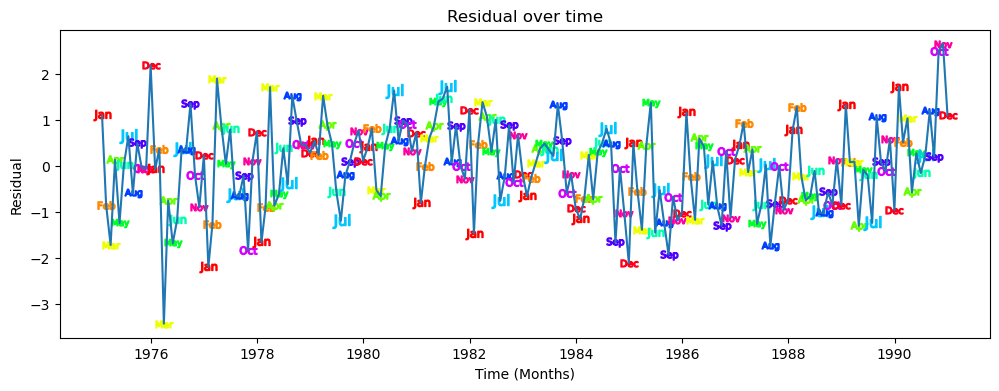

In [15]:
# 3.6 f
plot_monthly_markers(beersales.index, model.resid_pearson, "Time (Months)", "Residual", "Residual over time")

In [16]:
# 3.10 a
# create time index for estimation
hours["t"] = (hours.index - hours.index[0]).days
model = smf.ols("hours ~ t + np.power(t, 2)", hours).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     41.38
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           7.91e-12
Time:                        16:20:15   Log-Likelihood:                -31.964
No. Observations:                  60   AIC:                             69.93
Df Residuals:                      57   BIC:                             76.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.1462      0.159    246.886      0.000      38.829      39.464
t                  0.0026      0.000      6.297      0.000       0.002       0.003
np.power(t, 2) -9.733e-07    2.2e-07     -4.425      0.000   -1.41e-06   -5.33e-07
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.103
Skew:                           0.090   Prob(JB):                        0.950
Kurtosis:                       2.904   Cond. No.                     4.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/tmp/ipykernel_106174/2184366160.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


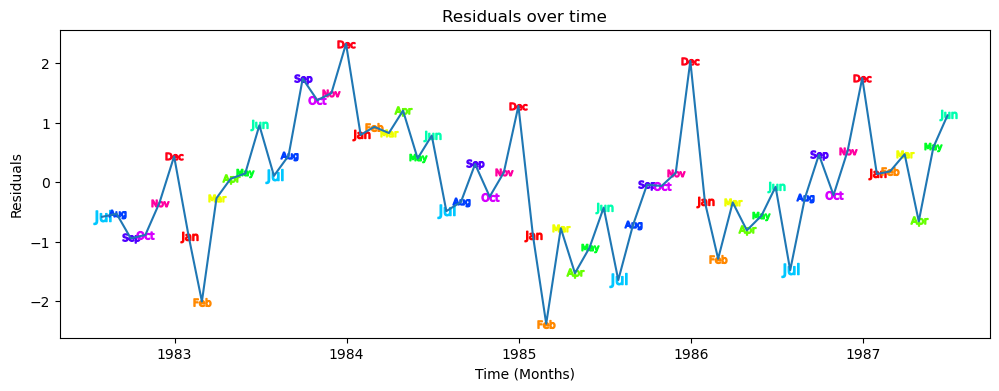

In [17]:
# 3.10 b
plot_monthly_markers(hours.index, model.resid_pearson, "Time (Months)", "Residuals", "Residuals over time")

In [18]:
# 3.10 c
from statsmodels.sandbox.stats.runs import runstest_1samp

z_score, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print(f'Z-score:\t {z_score}')
print(f'p-value:\t {p_value}')

Z-score:	 -3.9019582005393216
p-value:	 9.54176373202256e-05


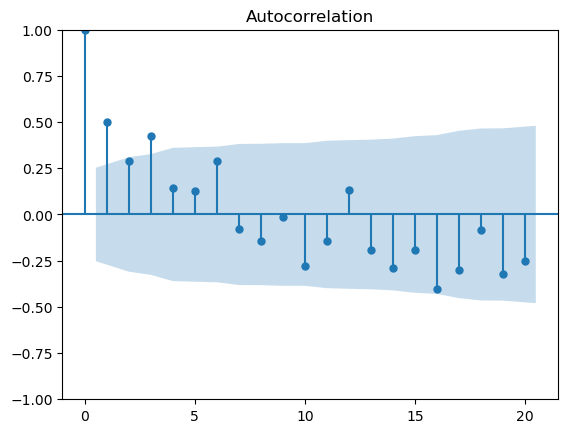

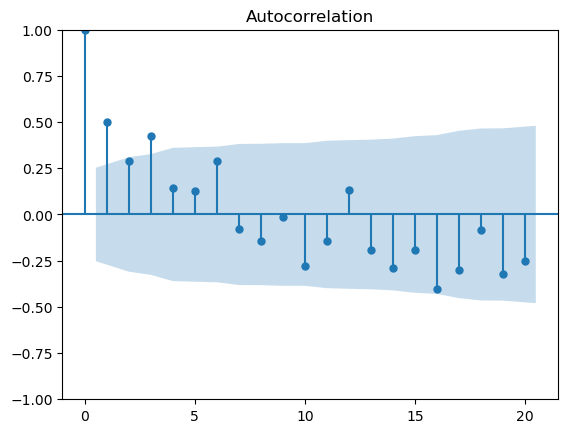

In [19]:
#3.10 d
sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

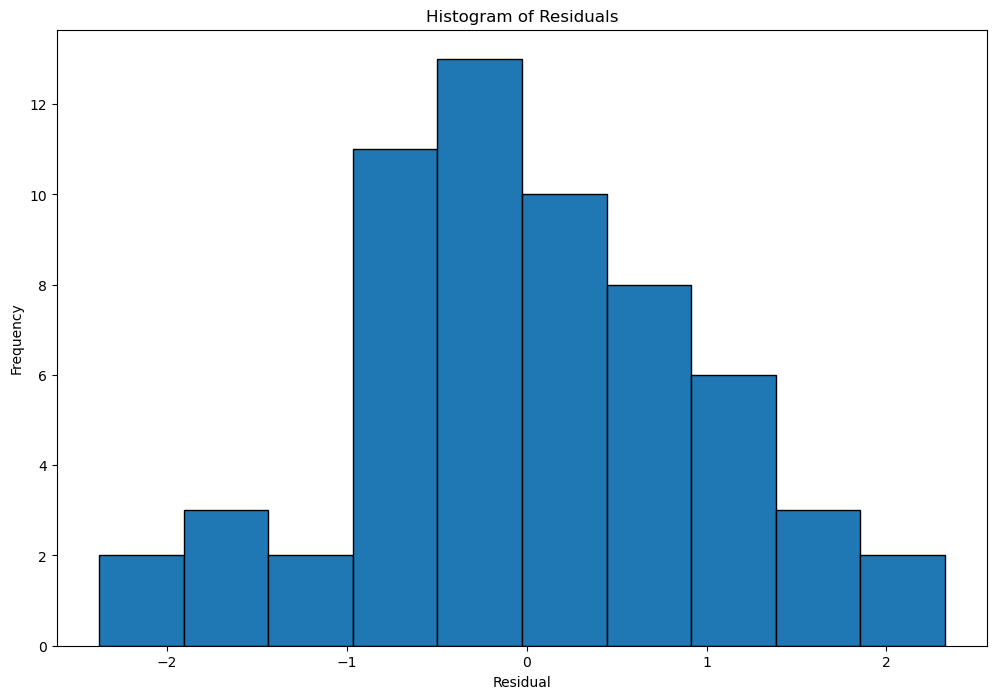

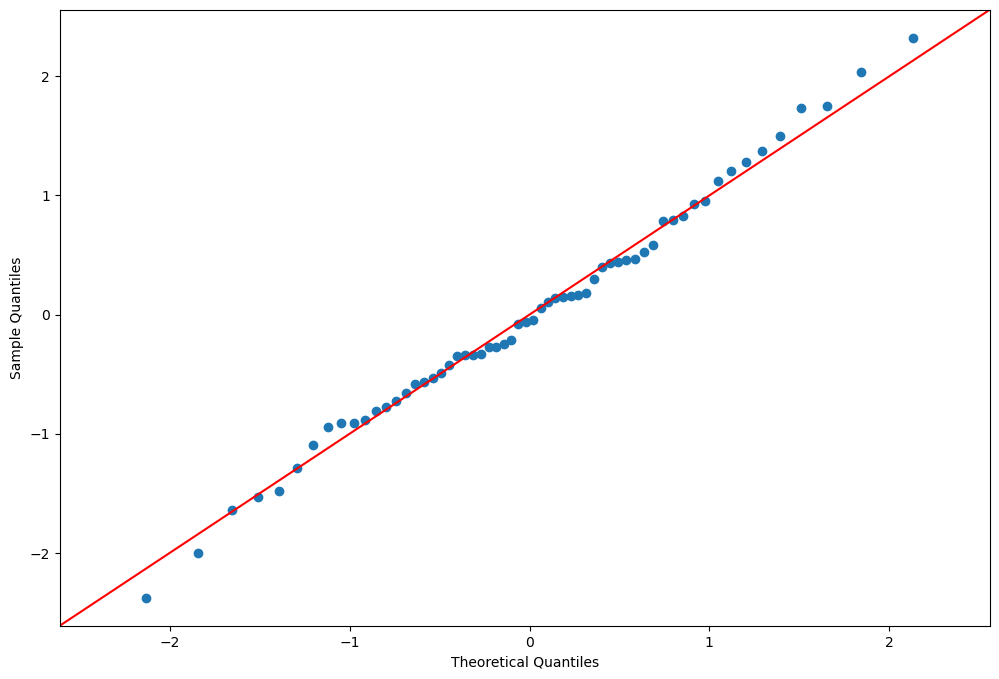

In [20]:
#3.10 e
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

print(model.resid_pearson)
with plt.rc_context(plt.rc("figure", figsize=(12, 8))):
    pp = sm.ProbPlot(model.resid_pearson)
pp.qqplot(line="45")

plt.show()

In [21]:
#3.12 a
model = smf.ols("beersales ~ t + np.power(t, 2) + C(month)", data=beersales).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              beersales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           9.47e-86
Time:                        16:53:27   Log-Likelihood:                -164.23
No. Observations:                 192   AIC:                             356.5
Df Residuals:                     178   BIC:                             402.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4667      0.188     55.629      0.000      10.095      10.838
C(month)[T.2]     -0.1568      0.209     -0.750      0.454      -0.569       0.256
C(month)[T.3]      2.0527      0.209      9.822      0.000       1.640       2.465
C(month)[T.4]      2.3535      0.209     11.261      0.000       1.941       2.766
C(month)[T.5]      3.5401      0.209     16.937      0.000       3.128       3.953
C(month)[T.6]      3.7768      0.209     18.068      0.000       3.364       4.189
C(month)[T.7]      3.6814      0.209     17.611      0.000       3.269       4.094
C(month)[T.8]      3.5075      0.209     16.777      0.000       3.095       3.920
C(month)[T.9]      1.4583      0.209      6.974      0.000       1.046       1.871
C(month)[T.10]     1.1264      0.209      5.387      0.000       0.714       1.539
C(month)[T.11]    -0.1889      0.209     -0.903      0.368      -0.602       0.224
C(month)[T.12]    -0.5770      0.209     -2.759      0.006      -0.990      -0.164
t                  0.0012      0.000     12.412      0.000       0.001       0.001
np.power(t, 2) -1.357e-07   1.68e-08     -8.095      0.000   -1.69e-07   -1.03e-07
==============================================================================
Omnibus:                        1.442   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.077
Skew:                          -0.141   Prob(JB):                        0.584
Kurtosis:                       3.235   Cond. No.                     1.89e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#3.12 b
from statsmodels.sandbox.stats.runs import runstest_1samp

z_score, p_value = runstest_1samp(model.resid_pearson, cutoff=0, correction=False)
print(f'Z-score:\t {z_score}')
print(f'p-value:\t {p_value}')

Z-score:	 -2.5606907870154956
p-value:	 0.010446428739886405


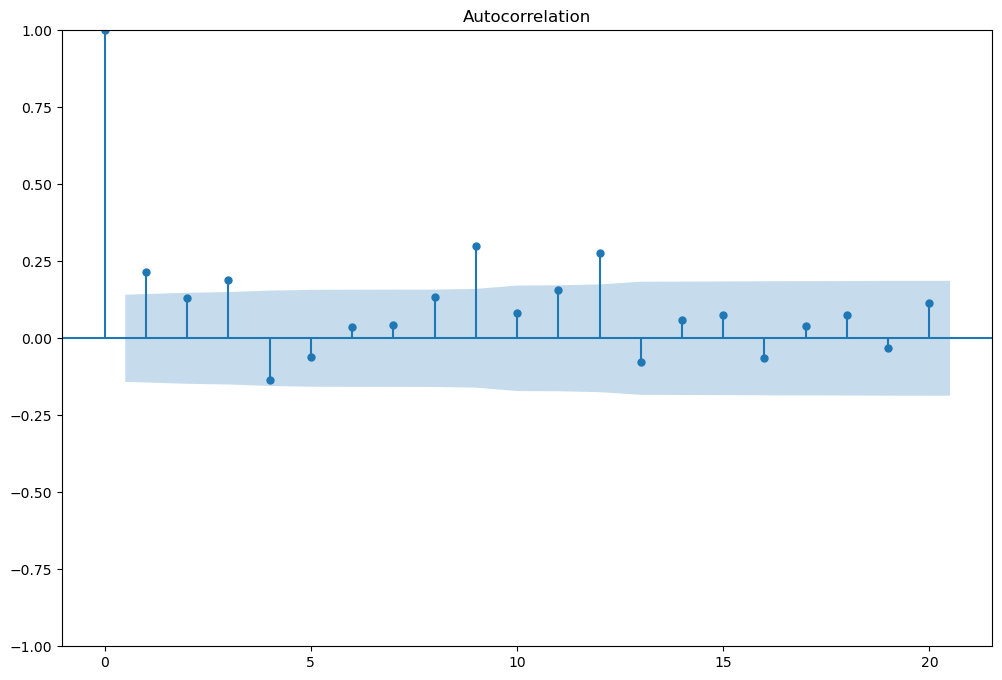

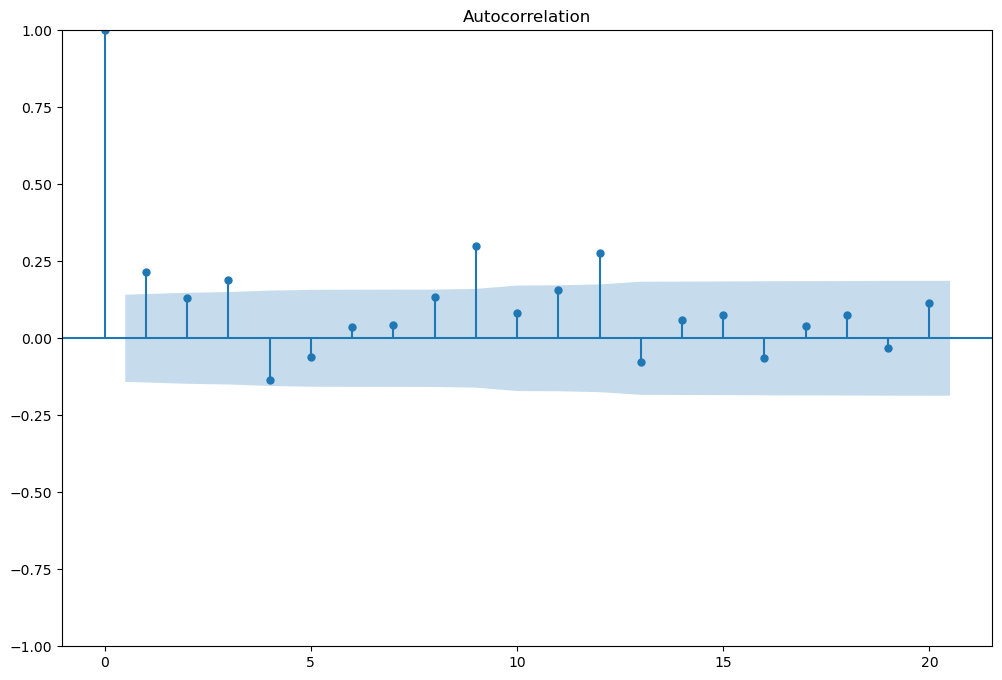

In [23]:
#3.12 c
sm.graphics.tsa.plot_acf(model.resid_pearson, lags=20)

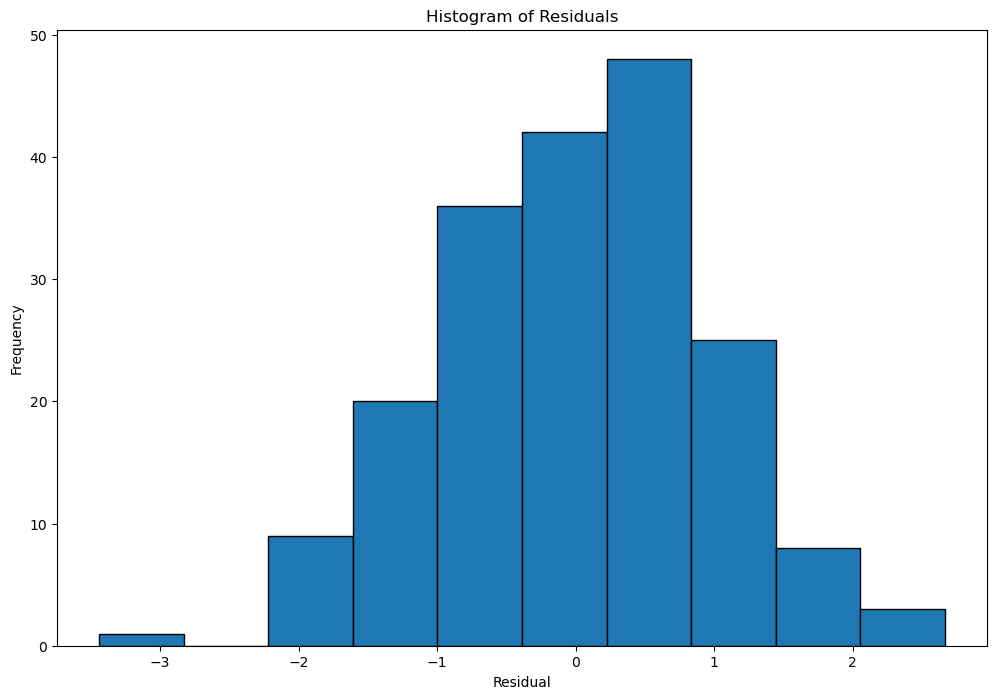

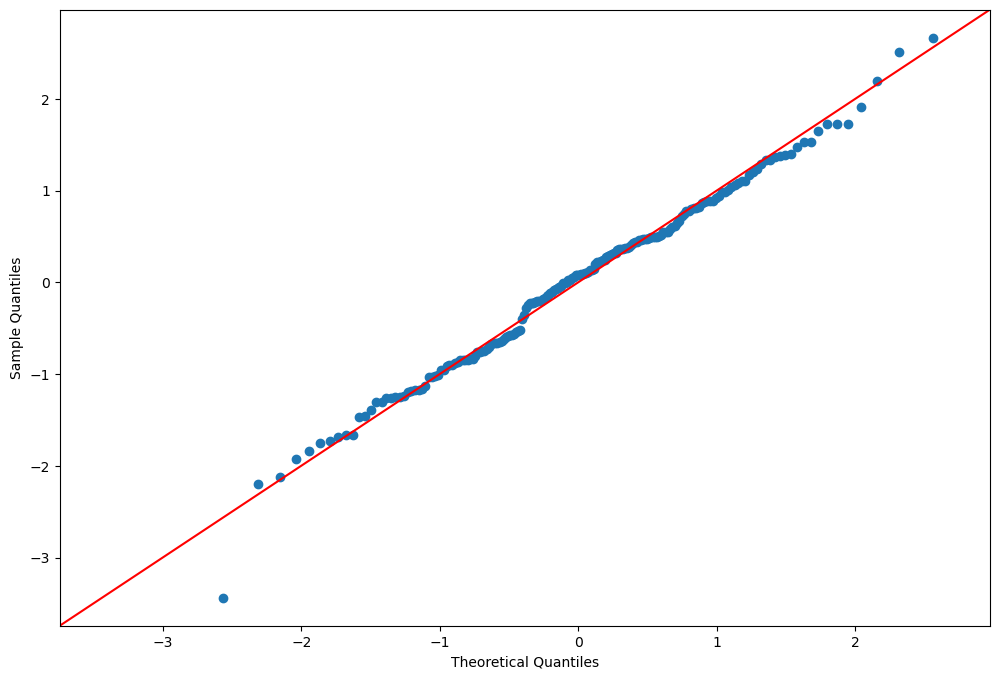

In [24]:
#3.12 d
plt.figure(figsize=(12, 8))
plt.hist(model.resid_pearson, edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

with plt.rc_context(plt.rc("figure", figsize=(12, 8))):
    pp = sm.ProbPlot(model.resid_pearson)
pp.qqplot(line="45")

plt.show()

/tmp/ipykernel_106174/716998126.py:4: RuntimeWarning: divide by zero encountered in divide
  y = (1 + phi) / (1 - phi)


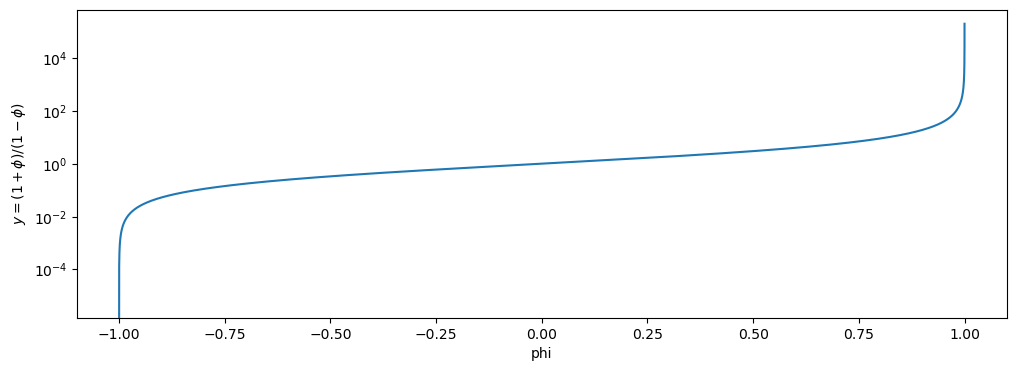

In [25]:
#3.16 c
num_points = int((1 - (-1)) / 0.00001) + 1
phi = np.linspace(-1, 1, num_points)
y = (1 + phi) / (1 - phi)
plt.figure(figsize=(12, 4))
plt.plot(phi, y)
plt.xlabel("phi")
plt.ylabel(r"$y = (1 + \phi) / (1-\phi)$")
plt.yscale("log")